In [0]:
!pip install pycbc lalsuite ligo-common
!sudo apt-get install git-lfs
!git config --global lfs.batch false

In [1]:
!curl https://git.ligo.org/lscsoft/lalsuite-extra/raw/master/data/lalsimulation/SEOBNRv2ChirpTimeSS.dat --output SEOBNRv2ChirpTimeSS.dat
!curl https://git.ligo.org/lscsoft/lalsuite-extra/raw/master/data/lalsimulation/SEOBNRv4ROM_v2.0.hdf5 --output SEOBNRv4ROM_v2.0.hdf5
!export LAL_DATA_PATH=$PWD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1191k  100 1191k    0     0  1198k      0 --:--:-- --:--:-- --:--:-- 1197k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  317M  100  317M    0     0  37.3M      0  0:00:08  0:00:08 --:--:-- 41.7M 21 67.2M    0     0  27.0M      0  0:00:11  0:00:02  0:00:09 27.0M


In [5]:
import h5py
import os
import lalsimulation
from pycbc import waveform
import matplotlib.pyplot as plt

In [3]:
!git lfs clone https://git.ligo.org/derek.white/public-lvcnr-matter.git
!git lfs fetch --include '/public-lvcnr-matter/CoRe/CoRe_BAM0001_R01_r00550.h5'

Cloning into 'public-lvcnr-matter'...
remote: Enumerating objects: 2891, done.
remote: Counting objects: 100% (2891/2891), done.
remote: Compressing objects: 100% (2890/2890), done.
remote: Total 2891 (delta 5), reused 2877 (delta 0), pack-reused 0
Receiving objects: 100% (2891/2891), 432.93 KiB | 0 bytes/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (2874/2874), done.
fetch: Fetching reference refs/heads/master510 MB | 5.8 MB/s                    


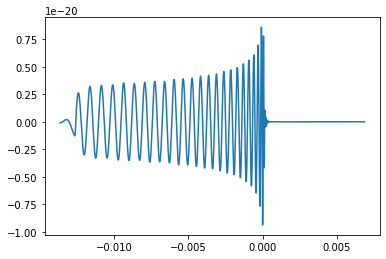

In [6]:
filepath=os.getcwd() + '/public-lvcnr-matter/CoRe/CoRe_BAM0001_R01_r00550.h5'

fd = h5py.File(filepath, 'r')

params = {}

m1 = fd.attrs['mass1']
m2 = fd.attrs['mass2']

s1x, s1y, s1z, s2x, s2y, s2z = lalsimulation.SimInspiralNRWaveformGetSpinsFromHDF5File(
                                                    0, 
                                                    fd.attrs['mass1']+fd.attrs['mass2'], 
                                                    filepath)



f_low=fd.attrs['f_lower_at_1MSUN']

hp, hc = waveform.get_td_waveform(
    approximant='NR_hdf5',
    numrel_data=filepath, 
    mass1=m1, 
    mass2=m2, 
    distance=1, 
    inclination=0,
    spin1z=s1z, 
    spin1x=s1x, 
    spin1y=s1y, 
    spin2z=s2z, 
    spin2x=s2x, 
    spin2y=s2y,
    coa_phase=0, 
    long_asc_nodes=0, 
    eccentricity=0, 
    mean_per_ano=0, 
    f_ref=0, 
    f_lower=f_low + 1,
    delta_t=1.0/(16384*8) 
)

fd.close()
plt.plot(hp.sample_times,hp)
plt.show()
